# Housing Price Prediction

Here are couple of things you need to ask before you start working on any machine
learning project.

1. How the performance of your model is going to be measured. There are many ways.
    Few of them are:
    - RMSE
    - MAE
2. Next, how to get the data. Best way is to write a small script to get the data,
    instead of downloading and extracting data manually. This is especially helpful
    if the data changes in future. This way you will get the latest data every time
    you run your code.

## To Do List

- Try few other scikit learn models
- Try neural networks too.
    <https://www.tensorflow.org/tutorials/keras/regression>
    <https://www.tensorflow.org/decision_forests/tutorials/beginner_colab>
- Learn more about saving models with joblib.

**Reference**
- Hands on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Aurelien Geron (Chapter-2)

# Imports

In [1]:
from pathlib import Path
import urllib.request
import tarfile

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Pandas version: {}".format(pd.__version__))

Pandas version: 1.5.1


# Get the data

In [3]:
# # URL to the file

# URL = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'

# def fetch_housing_data():
#     tarball_path = Path(Path.cwd(), 'housing.tgz')
#     if not tarball_path.is_file():
#         urllib.request.urlretrieve(URL, tarball_path)
#         with tarfile.open(tarball_path) as housing_tarball:
#             housing_tarball.extractall(path=Path.cwd())

# fetch_housing_data()

# Explore the Data

In [2]:
# Load the data as Pandas Dataframe
path_ds = Path(Path.cwd(), 'ds\housing.csv')
df_raw = pd.read_csv(path_ds)

# Look at the dataset scheme.
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Inferences:**
- Total attributes: 10
- Numerical Attributes: 9
- Categorical attributes: 1

In [3]:
# Let's take a quick look at the data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Inferences:**
- Total number of rows: 20640
- Attrbutes having null values: 1 (total_bedrooms)
- float64: 9
- object: 1 (categorical attributes)

So
- Need to handle missing data.

In [4]:
# Find categories for the categorical attributes.
df_raw['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


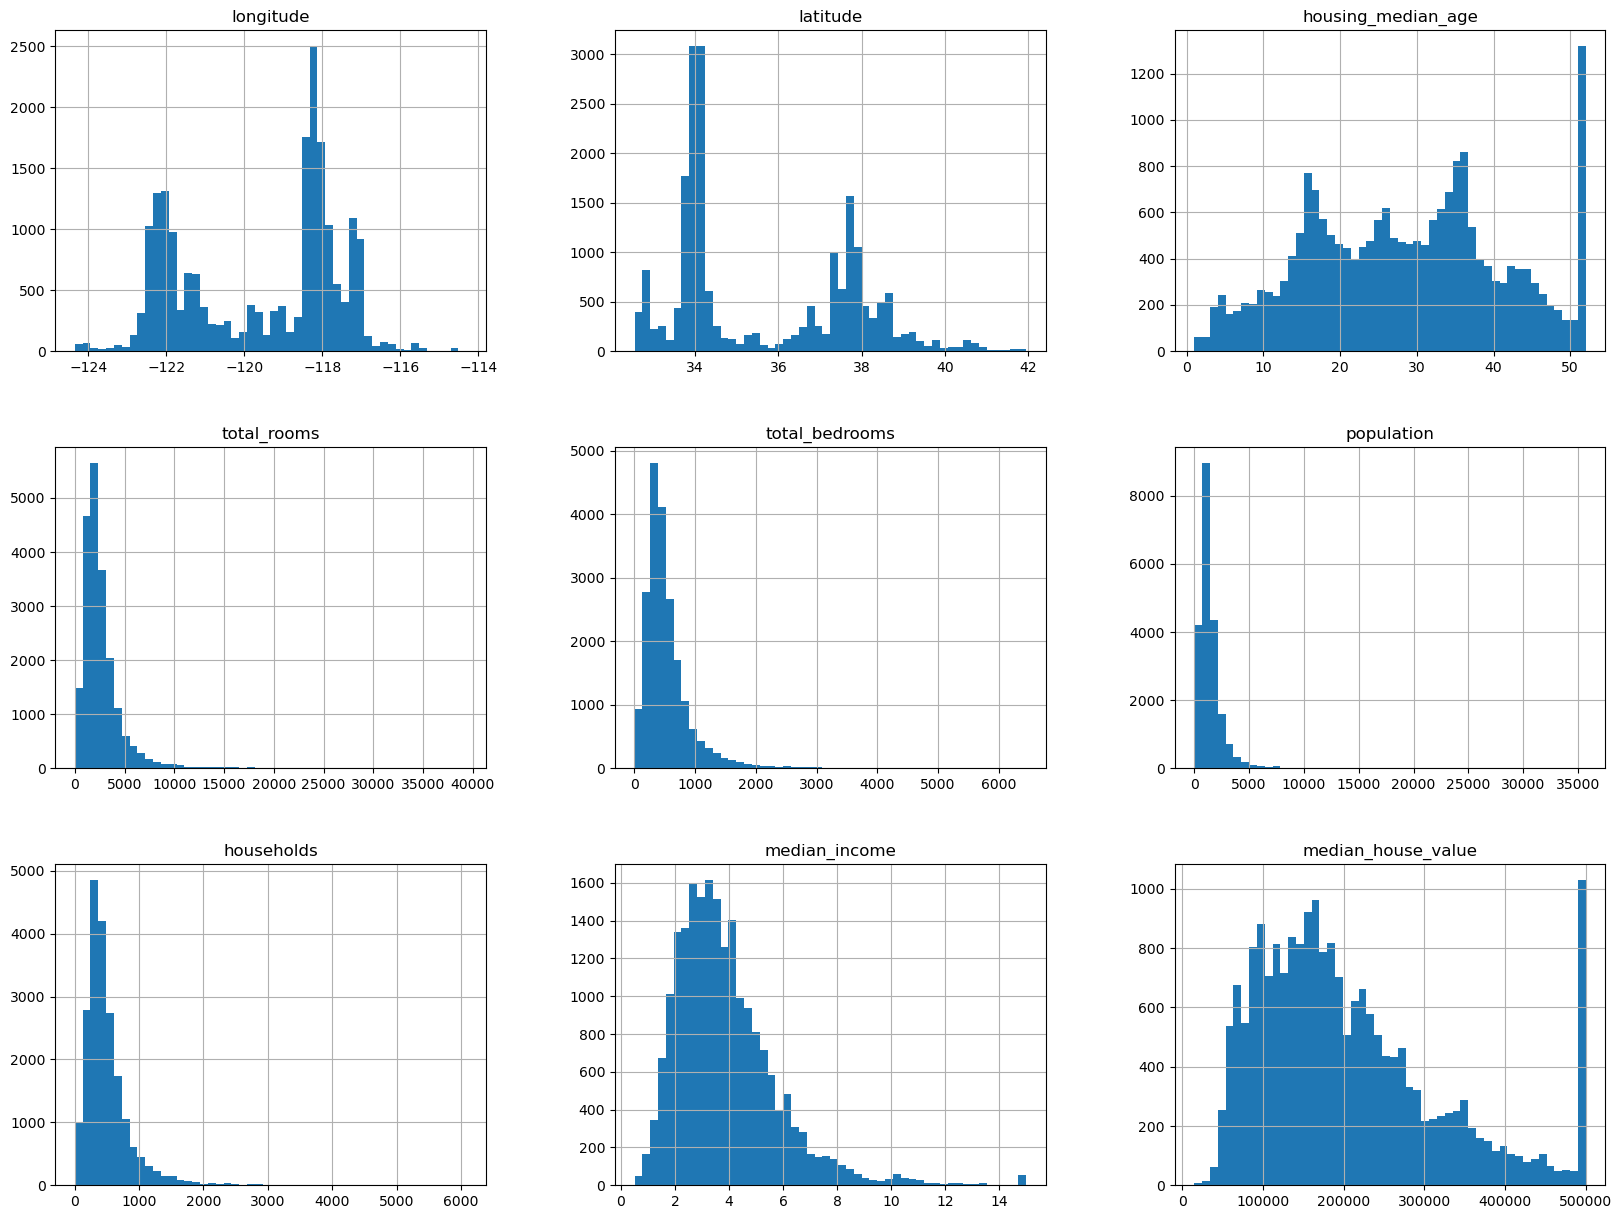

In [6]:
# Let's plot histogram of all attributes
df_raw.hist(bins=50, figsize=(20, 15))
plt.show()

**Inferences:**

Histograms can help us in determing visually how the data is spread.
- If you will look at the 'housing_median_age' and 'median_house_vlue', you can see that
    there are some houses which are way older than normal or there is some misentry in the
    data.
- Machine learning algorithms works fine with bell shaped data. But we can see that the data
    is not bell shaped but is trailing on the right side of the mean.

# Train Test Split

In [7]:
# Let's first do random splitting
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_raw, test_size=0.2, random_state=42)

In [8]:
print('Total samples: 20640')
print('Shape of the training set: {}'.format(train_set.shape))
print('Shape of the test set: {}'.format(test_set.shape))

Total samples: 20640
Shape of the training set: (16512, 10)
Shape of the test set: (4128, 10)


In [9]:
# Let's do stratified shuffle splitting.
housing = df_raw.copy()

In [10]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.Inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

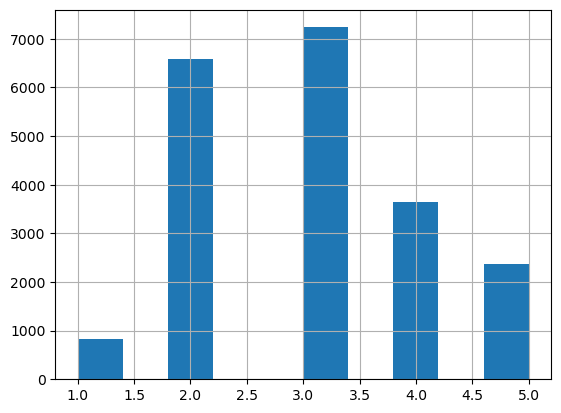

In [11]:
housing['income_cat'].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [13]:
for train_index, test_index in split_obj.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
# Check the category wise samples.
strat_train_set['income_cat'].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [15]:
# Now lets drop the income cat column
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


# Visualize the Data

In [17]:
# Before we move further, let's make a copy of training dataset so that
# we don't harm the original data.

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

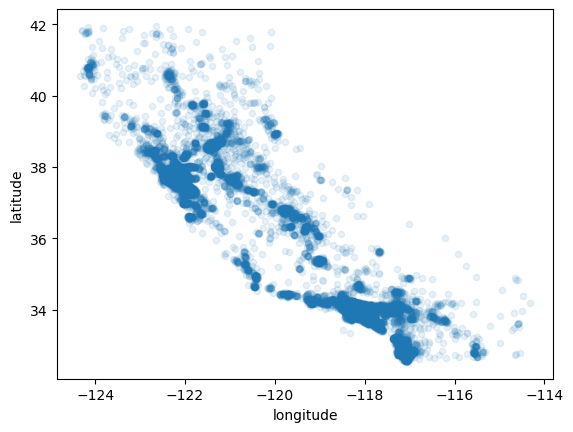

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

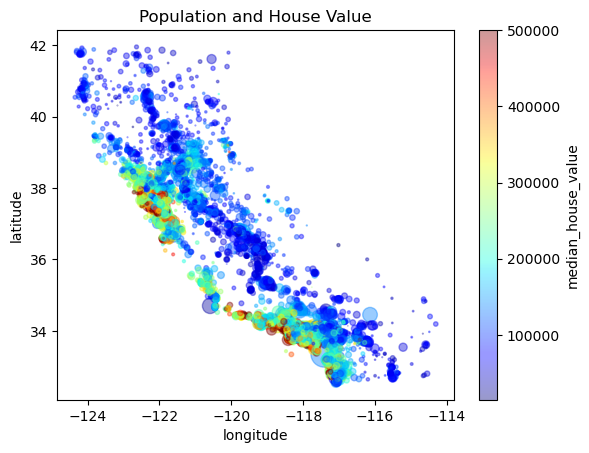

In [19]:
# Let's visualize the population and housing price. The size of the circle represents population
# and color represents housing price. 
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=housing['population']/100,
        c='median_house_value', colormap=plt.get_cmap('jet'), colorbar=True)
plt.title('Population and House Value')
plt.show()

# Looking at correlation

In [20]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [21]:
# Let's single out how other attributes are related to median house value.
corr_matrix['median_house_value']

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabe

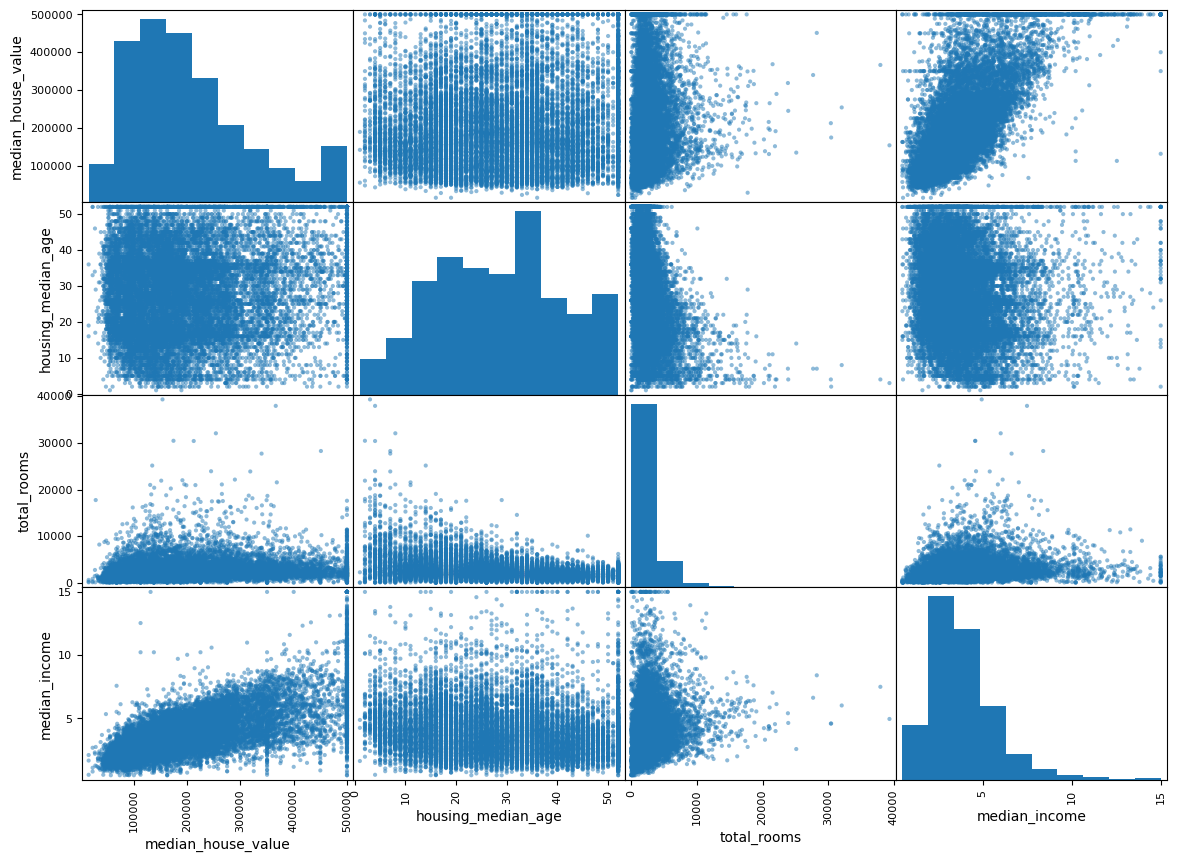

In [22]:
# Let's use pandas scatter_matrix function to look at the correlation between
# different attributes.

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'housing_median_age', 'total_rooms', 'median_income']
scatter_matrix(housing[attributes], figsize=(14, 10))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

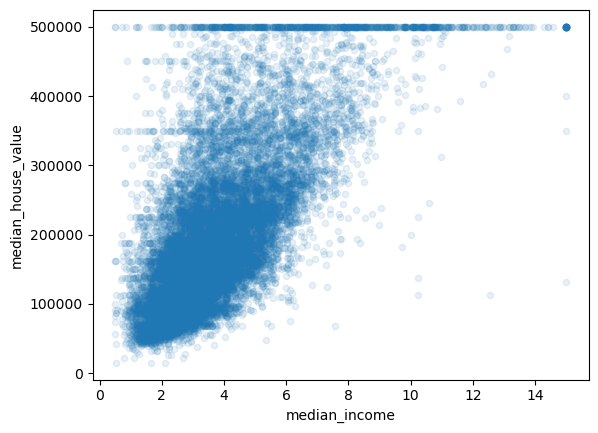

In [23]:
# As you can see from the above plots that median income is much strongly related to house price
# than any other attribute. So let's plot them in separate plot.

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

# Let's experiment with attribute combination

In [24]:
# There are few attributes which are not much useful in current format.
# These are total_rooms, pupolation, and total_bedrooms. More useful
# will be total drooms per household, total bedrooms per rooms, and
# population per household.Let's create these attributes.

housing['population_per_household'] = housing['population']/housing['households']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

In [25]:
# Now look at correlation.
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

# Prepare Data For Machine Learning Algorithms

In [26]:
# Let's separate attributes and labels.
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Handling Missing Values

In [27]:
# Let's take care of missing value.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# SimpleImputer works with numerical attributes only. So you need to drop
# non-numerical attributes from the dataset.

In [28]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
# Let's fill the missing values
X = imputer.transform(housing_num)

In [31]:
# Convert back to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## Handling Categorical Attributes

In [32]:
# Let's handle text or categorical values.

# First separate the categorical attribute.
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [33]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

To feed the data to machine learning algorithms, you need to change the categorical or text data to
numerical data. Here 'ocean_proximity' is the only categorical attribute and have only 5 categories.
There are multiple ways to handle categorical attributes. We will use OneHot encoding here.

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
housing_cat_1hot = enc.fit_transform(housing_cat)

In [35]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [36]:
enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformer

In [37]:
# from sklearn.base import BaseEstimator, TransformerMixin

# room_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room = True):
#         self.add_bedrooms_per_room = add_bedrooms_per_room

#     def fit(self, X, y=None):
#         return self

#     def transfrom(self, X):
#         rooms_per_household = X[:, room_ix]/X[:, households_ix]
#         population_per_household = X[:, population_ix]/X[:, households_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms_ix]/X[:, room_ix]
#             return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transfrom(housing.values)

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [38]:
# Let's change above data to DataFrame
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# Feature Scaling

Machine learning algorithms want data to have almost the same scale. So when there is much difference
different attributes, you need to do scaling. There are many method for, for example:

1. mim max scaling
1. standardization

Specially in case of neural networks, you need to make sure that data is in range 0-1.

# Transformation Pipeline

In [39]:
# Here is the pipeline to transform numerical attributes only.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
# Let's apply transformation to all types of column together.

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [41]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Select and Train Model

## Linear Regression model

In [46]:
# Let's train a Linear Regression Model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [48]:
# Let's try out the trained model

# First, get some data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [49]:
# Make prediction
print('Predictions: ')
print(lin_reg.predict(some_data_prepared))

Predictions: 
[ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [50]:
print(some_labels)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64


You can see from above predictions and labels that they are quite good. But there
is some errors too. Let's use RMSE (root mean squared error) on the whole training set to measure the accuracy
of our newly trained linear regression model.

In [51]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

## DecisionTreeRegression Model

In [52]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [54]:
housing_predictions = dec_tree_reg.predict(housing_prepared)
dec_mse = mean_squared_error(housing_predictions, housing_labels)
dec_rmse = np.sqrt(dec_mse)
dec_rmse

0.0

Zero error means, the model in overfitting badly. One reason for this is that
we are training and evaluating out model on the same dataset. Much better way
will be to divide the training set into two parts, training and validations set.
Then, we should traing model on the training dataset and evaluate the model on
the validation dataset. When we are sure that model is ready to be launched, then
only we need to evaluate our model on test set.

One better and easy way to divide the training dataset in training and validation
dataset is K-fold cross validation. This will divide the data into 'k' parts and then
train the model on (k-1) parts and evaluate on the one remaing part. And it will do so
until all parts have been used to evaluate model.

## Model Evaluation: Cross Validation

In [55]:
# Use K-fold cross validation on DecisionTreeRegression.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dec_tree_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)



In [58]:
# Display scores

def display_scores(scores):
    scores = np.sqrt(-scores)
    print(scores)
    print('Mean: {}'.format(scores.mean()))
    print('std deviation: {}'.format(scores.std()))

display_scores(scores)

[71935.03773822 71364.33463085 69228.71001555 71871.78659572
 69494.11229399 76755.67894909 71366.25255285 72512.19409585
 68413.08345225 68820.5233687 ]
Mean: 71176.1713693059
std deviation: 2320.6209801355717


In [59]:
# Let's try K-fold cross validation on LinearRegression

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)

display_scores(lin_scores)

[71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
std deviation: 2880.3282098180634


## RandomForestRegression

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions, housing_labels)
forset_rmse = np.sqrt(forest_mse)
forset_rmse

18724.40018371135

In [63]:
forset_rmse

18722.229406313

In [65]:
# Let's try K-fold cross validation

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                    scoring='neg_mean_squared_error', cv=10)

display_scores(forest_scores)

[51623.10195552 49168.36575387 46876.31171051 52014.84505961
 47375.14286439 51925.63907267 52340.89228367 49723.20897034
 48474.61624702 54118.08006267]
Mean: 50364.02039802859
std deviation: 2264.0169145684563


# Save The Model

You should save every model you train so that they can be used to compare the performance
of different models.